 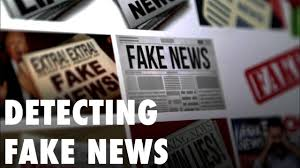

# **Import Libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

# **Read the Dataset:**

In [2]:
fake_df = pd.read_csv("/kaggle/input/fake-news-detection/Fake.csv")
true_df = pd.read_csv("/kaggle/input/fake-news-detection/True.csv")

# **Dataset Overview:**

In [3]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake_df.shape


(23481, 4)

In [6]:
true_df.shape

(21417, 4)

In [7]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [8]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


# **Data Preprocessing and Cleaning:**

**Check the Missing Values**

In [9]:
fake_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [10]:
true_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

**Inserting a column "class" as target feature**

In [11]:
fake_df["class"] = 0
true_df["class"] = 1

In [12]:
fake_df.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [13]:
true_df.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [15]:
df_testing = pd.concat([fake_df,true_df], axis = 0)
df_testing.to_csv("testing.csv")

**Merging True and Fake Dataframes**

In [16]:
df_merge = pd.concat([fake_df, true_df], axis =0 )
df_merge.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [17]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

**Drop Unnecessary Columns**

In [18]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [19]:
df.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


**Random Shuffling of Dataset:**

In [20]:
df = df.sample(frac = 1)
df.head()

,text,class
22055,Tune in to the Alternate Current Radio Network...,0
1380,A passenger wearing a Make America Great Agai...,0
21052,This video should be shown in town halls all a...,0
11167,(Reuters) - A pastor from Idaho who was among ...,1
19070,Liberals on Twitter just can t find enough rea...,0


In [21]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)
df.head()

,text,class
0,Tune in to the Alternate Current Radio Network...,0
1,A passenger wearing a Make America Great Agai...,0
2,This video should be shown in town halls all a...,0
3,(Reuters) - A pastor from Idaho who was among ...,1
4,Liberals on Twitter just can t find enough rea...,0


**Text Preprocessing**

In [22]:
def word(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [24]:
df["text"] = df["text"].apply(word)

In [25]:
df.head()

,text,class
0,tune in to the alternate current radio network...,0
1,a passenger wearing a make america great agai...,0
2,this video should be shown in town halls all a...,0
3,reuters a pastor from idaho who was among ...,1
4,liberals on twitter just can t find enough rea...,0


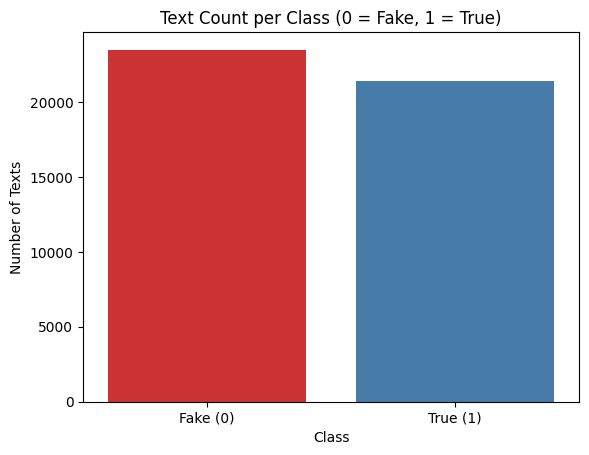

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'class' column contains 0 and 1 for Fake/True
sns.countplot(data=df, x="class" , palette="Set1")

plt.title("Text Count per Class (0 = Fake, 1 = True)")
plt.xlabel("Class")
plt.ylabel("Number of Texts")
plt.xticks([0, 1], ['Fake (0)', 'True (1)'])
plt.show()

# **Train-Test Split:**

In [28]:
x = df["text"]
y = df["class"]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=400)

# **Convert text to vectors**

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# **Gradient Boosting Classifier**

# **Model Training**

In [31]:
gbc = GradientBoostingClassifier()
gbc.fit(xv_train, y_train)
y_pred = gbc.predict(xv_test)
gbc.score(xv_test, y_test)

0.9947661469933184

# **Model Evaluation**

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4672
           1       0.99      1.00      0.99      4308

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Confusion Matrix:
 [[4632   40]
 [   7 4301]]
Accuracy Score:  0.9947661469933184


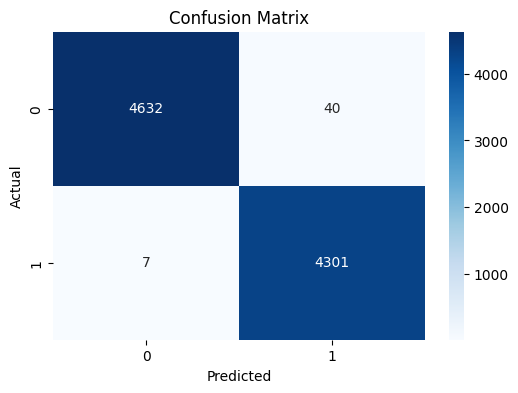

In [35]:
#Evaluating the model performance
from sklearn.metrics import confusion_matrix, classification_report


print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Prediction:**

In [41]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(word) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    y_pred = gbc.predict(new_xv_test)
    

    return print("\n\nPrediction: {}".format(output_lable(y_pred[0])))
                                                                                                    

In [42]:
news = str(input())
manual_testing(news)

 In a move aimed at strengthening international cooperation in public health, the World Health Organization (WHO) has launched a global initiative to enhance pandemic preparedness.  The initiative brings together governments, research institutions, and health agencies from over 90 countries to share data, resources, and best practices.   Speaking at the launch event in Geneva, WHO Director-General Dr. Tedros Adhanom Ghebreyesus emphasized the importance of learning from past pandemics and investing in health systems  that can rapidly detect and respond to new threats. The program includes a $5 billion fund to improve surveillance infrastructure and vaccine distribution in low-income countries.   Experts say that with the world still recovering from the COVID-19 pandemic, building stronger public health networks is critical to preventing future crises.




Prediction: Fake News


In [43]:
news = str(input())
manual_testing(news)

 NASA scientists have confirmed that the Earth will experience 72 hours of complete darkness next month due to a rare cosmic alignment.  This phenomenon, according to a leaked internal memo, will block sunlight from reaching the planet for three consecutive days.   The document, allegedly from NASA's top-secret climate division, has been circulating on social media and claims that governments are preparing emergency responses,  including food and water rations. Officials urge citizens to stay indoors and avoid using electronic devices during this blackout, as cosmic rays may interfere with  satellite communications and brain waves.   So far, major news outlets and scientific journals have not reported on this event.




Prediction: Fake News


In [45]:
news = str(input())
manual_testing(news)

 SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years o



Prediction: Not A Fake News


# **Save the Model:**

In [47]:
import joblib

joblib.dump(gbc, "gbc_model.pkl")

['gbc_model.pkl']